In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('daily_adjusted_VOO.csv')
prices = df[['timestamp','open']]
prices.rename(columns={'timestamp' : 'date', 'open' : 'price'}, inplace = True)
prices

C:\Users\bbobo\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,date,price
0,2021-07-21,397.480
1,2021-07-20,391.345
2,2021-07-19,391.780
3,2021-07-16,400.840
4,2021-07-15,399.740
...,...,...
2730,2010-09-15,51.310
2731,2010-09-14,51.420
2732,2010-09-13,51.480
2733,2010-09-10,50.840


In [2]:
#Converting the date to a datetime
prices['date']  = pd.to_datetime(prices['date'], format = '%Y-%m-%d')


<ipython-input-2-f2cfaaa677f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['date']  = pd.to_datetime(prices['date'], format = '%Y-%m-%d')


In [3]:
#setting the date as index
prices.set_index(['date'], inplace =True)
prices

,price
date,
2021-07-21,397.480
2021-07-20,391.345
2021-07-19,391.780
2021-07-16,400.840
2021-07-15,399.740
...,...
2010-09-15,51.310
2010-09-14,51.420
2010-09-13,51.480


In [4]:
#Separating the df for every year
df2020 = prices.loc['2020']
df2019 = prices.loc['2019']
df2018 = prices.loc['2018']
df2017 = prices.loc['2017']
df2016 = prices.loc['2016']
df2015 = prices.loc['2015']
df2014 = prices.loc['2014']
df2013 = prices.loc['2013']
df2012 = prices.loc['2012']
df2011 = prices.loc['2011']
df2010 = prices.loc['2010']


Realised that on October 24, 2013, there was a 1 for 2 reverse spli. meaning for each 2 shares of VOO owned pre-split, the shareholder now owned 1 share. For example, a 1000 share position pre-split, became a 500 share position following the split.
So in this case, to make the change in the price to be fair, will have to account for the reverse split.Hence all the values before the split can be multiple by 2 to increase reliability.

In [5]:
#Reset the index for df2013 and change the dtype of "date" back to string to use the .str function to locate the index which the
#split occured

df2013.reset_index(inplace = True)

In [6]:
df2013['date'] = df2013['date'].astype(str)

<ipython-input-6-65969cdc27dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2013['date'] = df2013['date'].astype(str)


In [7]:
filt = df2013['date'].str.contains('2013-10-23')
df2013.loc[filt]

,date,price
47,2013-10-23,80.08


In [8]:
df2013.tail()

,date,price
247,2013-01-08,66.72
248,2013-01-07,66.77
249,2013-01-04,66.81
250,2013-01-03,66.82
251,2013-01-02,66.47


Now we know that in df2013, from index 47 to 251, all this values have to be mulitpled by 2

In [9]:
df2013.loc[47:251,'price'] = df2013.loc[47:251,'price'] * 2

C:\Users\bbobo\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [10]:
#Converting the 'date' back to datetime and set 'date' as index
df2013['date']  = pd.to_datetime(df2013['date'], format = '%Y-%m-%d')

<ipython-input-10-2aaa52d14036>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2013['date']  = pd.to_datetime(df2013['date'], format = '%Y-%m-%d')


In [11]:
df2013.set_index(['date'],inplace = True)

In [12]:
df2012['price'] = df2012['price'] *2
df2011['price'] = df2011['price'] *2
df2010['price'] = df2010['price'] *2

<ipython-input-12-3bbb9d70d8aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2012['price'] = df2012['price'] *2
<ipython-input-12-3bbb9d70d8aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2011['price'] = df2011['price'] *2
<ipython-input-12-3bbb9d70d8aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [13]:
#Ensure that the last trading day of the year is at the top
df2020.sort_index(ascending = False, inplace =True)
df2019.sort_index(ascending = False, inplace =True)
df2018.sort_index(ascending = False, inplace =True)
df2017.sort_index(ascending = False, inplace =True)
df2016.sort_index(ascending = False, inplace =True)
df2015.sort_index(ascending = False, inplace =True)
df2014.sort_index(ascending = False, inplace =True)
df2013.sort_index(ascending = False, inplace =True)
df2012.sort_index(ascending = False, inplace =True)
df2011.sort_index(ascending = False, inplace =True)
df2010.sort_index(ascending = False, inplace =True)

In [14]:
#fees for buying will be USD 8.80
#Calculating the average cost for lump sum. The purchase will be done on the last trading day of each year and the fees 
# 8.80 USD and the total capital spend per year is 36000 USD.

lst = [df2020,df2019,df2018,df2017,df2016,df2015,df2014,df2013,df2012,df2011,df2010]
lst.reverse()
total_quat = 0
ave_scost_lst = []
last_price_lst = []
for i in range(len(lst)):
    price = lst[i].iloc[0,0]
    last_price_lst.append(price)
    buy_quat = 3600/price
    total_quat += buy_quat
    x = 3608.80*(i+1)/total_quat
    ave_scost_lst.append(x)
    
    
total_capital = (3600+8.80) * len(lst) 
ave_ls_cost = total_capital/total_quat

print("The total money spend is:" + str(total_capital))
print("The average cost is:" + str(ave_ls_cost))

The total money spend is:39696.8
The average cost is:179.99463760095404


In [15]:
#Calculating RSP average cost
#Converting back the index to the original so that the date can be converted to a string and can be used to determine if 
# specific dates are found in the df


df2020.reset_index(inplace = True)
df2019.reset_index(inplace = True)
df2018.reset_index(inplace = True)
df2017.reset_index(inplace = True)
df2016.reset_index(inplace = True)
df2015.reset_index(inplace = True)
df2014.reset_index(inplace = True)
df2013.reset_index(inplace = True)
df2012.reset_index(inplace = True)
df2011.reset_index(inplace = True)
df2010.reset_index(inplace = True)


In [16]:
'''df2020
df2019
df2018
df2017
df2016
df2015
df2014
df2013
df2012
df2011
df2010'''

'df2020\ndf2019\ndf2018\ndf2017\ndf2016\ndf2015\ndf2014\ndf2013\ndf2012\ndf2011\ndf2010'

In [17]:
#Converting the date from datetime to str

def tostr(xdf):
    xdf['date'] = xdf['date'].astype(str)

for i in range(len(lst)):
    tostr(lst[i])

<ipython-input-17-729ad0bf4f97>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xdf['date'] = xdf['date'].astype(str)


In [18]:
# Function to return the string of the 8th day of every month"
def monthget(x):
    lst = []
    for i in range(10):
        date = str(x) + "-0" + str(i) + "-08"
        lst.append(date)
    for i in range(10,13,1):
        date = str(x) + "-" + str(i) + "-08"
        lst.append(date)
    lst.pop(0)
    return lst
    

In [19]:
#Storing all the 8th of every month in a list
yrlst = []
yr = 2020

for i in range(len(lst)):
    x = monthget(yr)
    yr -=1
    yrlst.append(x)
yrlst

[['2020-01-08',
  '2020-02-08',
  '2020-03-08',
  '2020-04-08',
  '2020-05-08',
  '2020-06-08',
  '2020-07-08',
  '2020-08-08',
  '2020-09-08',
  '2020-10-08',
  '2020-11-08',
  '2020-12-08'],
 ['2019-01-08',
  '2019-02-08',
  '2019-03-08',
  '2019-04-08',
  '2019-05-08',
  '2019-06-08',
  '2019-07-08',
  '2019-08-08',
  '2019-09-08',
  '2019-10-08',
  '2019-11-08',
  '2019-12-08'],
 ['2018-01-08',
  '2018-02-08',
  '2018-03-08',
  '2018-04-08',
  '2018-05-08',
  '2018-06-08',
  '2018-07-08',
  '2018-08-08',
  '2018-09-08',
  '2018-10-08',
  '2018-11-08',
  '2018-12-08'],
 ['2017-01-08',
  '2017-02-08',
  '2017-03-08',
  '2017-04-08',
  '2017-05-08',
  '2017-06-08',
  '2017-07-08',
  '2017-08-08',
  '2017-09-08',
  '2017-10-08',
  '2017-11-08',
  '2017-12-08'],
 ['2016-01-08',
  '2016-02-08',
  '2016-03-08',
  '2016-04-08',
  '2016-05-08',
  '2016-06-08',
  '2016-07-08',
  '2016-08-08',
  '2016-09-08',
  '2016-10-08',
  '2016-11-08',
  '2016-12-08'],
 ['2015-01-08',
  '2015-02-08',
  '

In [20]:
#To access the index of the year list
def yeartoindex(x):
    if x == 2020:
        return 0
    elif x == 2019:
        return 1
    elif x == 2018:
        return 2
    elif x == 2017:
        return 3
    elif x == 2016:
        return 4
    elif x == 2015:
        return 5
    elif x == 2014:
        return 6
    elif x == 2013:
        return 7
    elif x == 2012:
        return 8
    elif x == 2011:
        return 9
    elif x == 2010:
        return 10

In [21]:
#To find out for each year, which months will have the "8th" as a trading day. If the 8th of the month is not a trading day, 
# 'empty' string will be added
def containmonth(xdf,year):
    contain_lst = []
    month = 0
    while month <=11:
        filt = xdf['date'].str.contains(yrlst[yeartoindex(year)][month])
        length = len(xdf[filt])
        if length >=1 :
            contain_lst.append(yrlst[yeartoindex(year)][month])
        else:
            contain_lst.append("empty")
        month +=1
            
    return contain_lst

In [22]:
lst2020 = containmonth(df2020,2020)
print(lst2020)


['2020-01-08', 'empty', 'empty', '2020-04-08', '2020-05-08', '2020-06-08', '2020-07-08', 'empty', '2020-09-08', '2020-10-08', 'empty', '2020-12-08']


In [23]:
lst2019 = containmonth(df2019,2019)
lst2018 = containmonth(df2018,2018)
lst2017 = containmonth(df2017,2017)
lst2016 = containmonth(df2016,2016)
lst2015 = containmonth(df2015,2015)
lst2014 = containmonth(df2014,2014)
lst2013 = containmonth(df2013,2013)
lst2012 = containmonth(df2012,2012)
lst2011 = containmonth(df2011,2011)
lst2010 = containmonth(df2010,2010)


In [24]:
'''To find out each year, how much shares are being bought. Every month the purchase will be done on the 8th
However, if the 8th of that month is not a trading day, it will be accummulate and the purchase will be done on the next
subsquent month. 
E.g. 8th Jan 2020 is not a trading day. The supposed spent 300 USD will be accummulated to the next month 8th Feb 2020. If 
8th Feb 2020 is a trading day, a total of 600 USD will be spent. However, if 8th Feb 2020 isnt a trading day, the money will 
continue to accumulate until the next available trading day'''

def monthquant(xdf,xlst):
    total_quat = 0
    count = 0
    for i in range(len(xlst)):
        if xlst[i] == "empty":
            count +=1
        else:
            count +=1
            index = xdf[xdf['date'] == xlst[i]].index
            price = float(xdf.loc[index,'price'])
            quat = (300+1)*count/price
            total_quat += quat
            count = 0
    return total_quat
            

In [25]:
#To find out the quantity bought got each year
masterdf = [df2020,df2019,df2018,df2017,df2016,df2015,df2014,df2013,df2012,df2011,df2010]
masterlst = [lst2020,lst2019,lst2018,lst2017,lst2016,lst2015,lst2014,lst2013,lst2012,lst2011,lst2010]


In [26]:
monthly_quant = []
year = 2020
for i in range(len(masterdf)):
    index = yeartoindex(year)
    year -=1
    monthly_quant.append(monthquant(masterdf[index],masterlst[index]))
monthly_quant.reverse()

In [27]:
ave_cost_rsp = 3612*len(masterlst)/sum(monthly_quant)
ave_cost_rsp

175.7158972743691

In [28]:
ave_cost_lst = []
acc_quant = 0
for i in range(len(monthly_quant)):
    acc_quant += monthly_quant[i]
    x = 3612*(i+1)/acc_quant
    ave_cost_lst.append(x)


In [29]:
datelst =['2020','2019', '2018','2017','2016','2015','2014','2013','2012','2011','2010']
datelst.reverse()
ave ={
    'date' : datelst,
    'RSP Ave Cost' : ave_cost_lst,
    'Lump Sum Ave Cost' : ave_scost_lst,
    'Closing Price' : last_price_lst
}
avedf = pd.DataFrame(ave)
avedf.set_index('date',inplace = True)

avedf

,RSP Ave Cost,Lump Sum Ave Cost,Closing Price
date,,,
2010,106.993094,115.140769,114.86
2011,111.715948,115.370870,115.32
2012,119.275007,119.361551,127.92
2013,127.543024,128.831315,168.66
2014,135.068712,137.824455,190.75
2015,141.684712,144.297279,188.12
2016,147.128575,150.814370,206.37
2017,153.761172,158.549859,246.76
2018,161.783620,164.210837,229.31


<AxesSubplot:xlabel='date'>

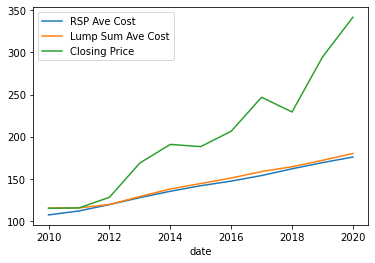

In [30]:
avedf.plot()

In [31]:
totaldf = avedf

In [32]:
totaldf['RSP pctchange'] = (totaldf['Closing Price'] - totaldf['RSP Ave Cost']) / totaldf['RSP Ave Cost'] *100
totaldf['LS pctchange'] = (totaldf['Closing Price'] - totaldf['Lump Sum Ave Cost']) / totaldf['Lump Sum Ave Cost'] *100
totaldf['pct diff'] = totaldf['RSP pctchange'] - totaldf['LS pctchange'] 

In [33]:
totaldf

,RSP Ave Cost,Lump Sum Ave Cost,Closing Price,RSP pctchange,LS pctchange,pct diff
date,,,,,,
2010,106.993094,115.140769,114.86,7.352723,-0.243848,7.596571
2011,111.715948,115.370870,115.32,3.226085,-0.044093,3.270178
2012,119.275007,119.361551,127.92,7.247951,7.170189,0.077761
2013,127.543024,128.831315,168.66,32.237730,30.915375,1.322355
2014,135.068712,137.824455,190.75,41.224416,38.400692,2.823724
2015,141.684712,144.297279,188.12,32.773675,30.369749,2.403927
2016,147.128575,150.814370,206.37,40.265071,36.837093,3.427978
2017,153.761172,158.549859,246.76,60.482647,55.635584,4.847063
2018,161.783620,164.210837,229.31,41.738700,39.643646,2.095054


In [34]:
'''As seen from the results, having a RSP will yield a lower average cost as compared to a lum sum investing. However,
the percent difference is not alot.



'''

'As seen from the results, having a RSP will yield a lower average cost as compared to a lum sum investing. However,\nthe percent difference is not alot.\n\n\n\n'